In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/smsspamcollection (1).tsv",sep="\t")

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df["label"].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
spam.shape[0]

747

In [ ]:
ham=ham.sample(spam.shape[0])

In [ ]:
ham.shape

(747, 4)

In [ ]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
data = pd.concat([ham, spam], ignore_index=True)

In [ ]:
data.head()

,label,message,length,punct
0,ham,Lol ok. I'll snatch her purse too.,34,3
1,ham,Enjoy the showers of possessiveness poured on ...,133,4
2,ham,i dnt wnt to tlk wid u,22,0
3,ham,No problem with the renewal. I.ll do it right ...,79,3
4,ham,Gal n boy walking in d park. gal-can i hold ur...,160,13


In [ ]:
data.shape

(1494, 4)

data visl

<function matplotlib.pyplot.show(close=None, block=None)>

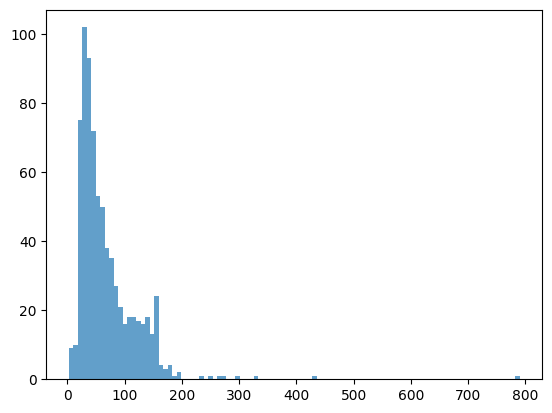

In [ ]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

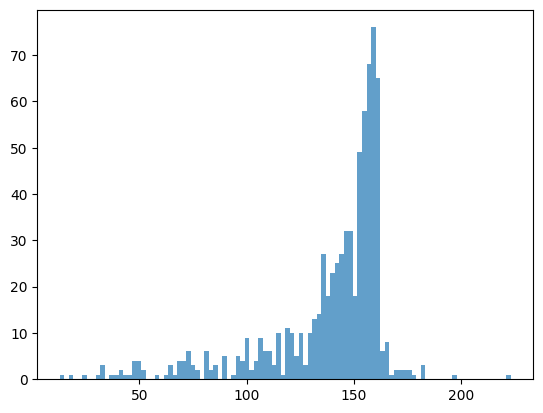

In [ ]:
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

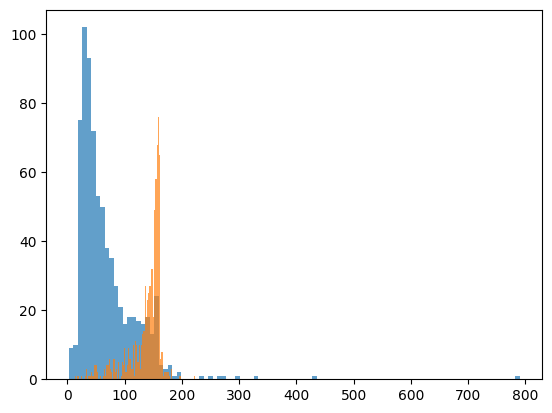

In [ ]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

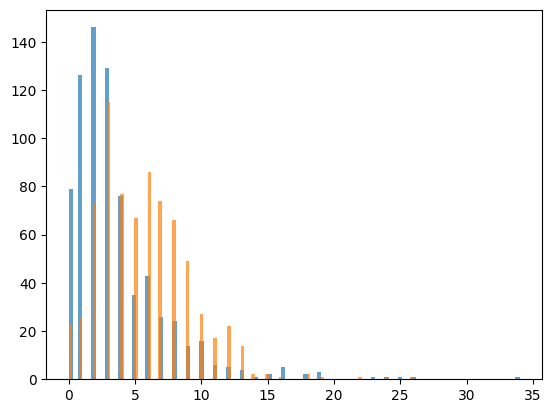

In [ ]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show

split the date

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,
                                               random_state=0,shuffle=True)

In [ ]:
x_train

,message
1438,You have 1 new message. Please call 08715205273
431,I emailed yifeng my part oredi.. Can ü get it ...
194,I am not sure about night menu. . . I know onl...
240,Just hopeing that wasn‘t too pissed up to reme...
1309,Had your mobile 11 months or more? U R entitle...
...,...
763,Your free ringtone is waiting to be collected....
835,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216,Dorothy@kiefer.com (Bank of Granite issues Str...
559,Hi Petey!noim ok just wanted 2 chat coz avent...


build the model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

predicting the result

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 20, 202]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9532293986636972

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



In [ ]:
classifier.predict(["Hello, You are learning NLP"])

array(['ham'], dtype=object)

In [ ]:
classifier.predict(["How are you"])

array(['ham'], dtype=object)

In [ ]:
classifier.predict(["00943"])

array(['ham'], dtype=object)

build svm model



In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(C=100,gamma='auto'))])

In [ ]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
# confusion_matrix
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 20, 202]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9532293986636972